# Get info Box (store in Python dictionary)

In [ ]:
#Import Necessary Libraries

In [2]:
from bs4 import BeautifulSoup as bs
import requests

In [3]:
#Load the webpage

r = requests.get("https://en.wikipedia.org/wiki/Avengers:_Endgame")

#Convert to a beautiful soup object
soup = bs(r.content)

#print out the HTML
contents = soup.prettify()
print(contents)




<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Avengers: Endgame - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-featu

In [4]:
info_box = soup.find(class_="infobox vevent")
info_rows = info_box.find_all("tr")
for row in info_rows:
    print(row.prettify());

<tr>
 <th class="infobox-above summary" colspan="2" style="font-size: 125%; font-style: italic;">
  Avengers: Endgame
 </th>
</tr>

<tr>
 <td class="infobox-image" colspan="2">
  <span class="mw-default-size" typeof="mw:File/Frameless">
   <a class="mw-file-description" href="/wiki/File:Avengers_Endgame_poster.jpg" title='The theatrical release poster for "Avengers: Endgame". The characters depicted are seen on a starry background.'>
    <img alt='The theatrical release poster for "Avengers: Endgame". The characters depicted are seen on a starry background.' class="mw-file-element" data-file-height="326" data-file-width="220" decoding="async" height="326" src="//upload.wikimedia.org/wikipedia/en/0/0d/Avengers_Endgame_poster.jpg" width="220"/>
   </a>
  </span>
  <div class="infobox-caption">
   Theatrical release poster
  </div>
 </td>
</tr>

<tr>
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">
  Directed by
 </th>
 <td class="infobox-data">


In [7]:
def get_content_value(row_data):
    if row.find("li"):
        return [li.get_text(" ", strip = True).replace("\xa0", " ") for li in row_data.find_all("li")]
    else:
        return row_data.get_text(" ", strip = True).replace("\xa0", " ")
    
movie_info = {}
    
for index,row in enumerate(info_rows):
    if index == 0:
        movie_info['title'] = row.find("th").get_text(" ", strip = True)
    elif index == 1:
        continue
    else:
        content_key = row.find("th").get_text(" ", strip = True)
        content_value = get_content_value(row.find("td"))
        movie_info[content_key] = content_value
    
movie_info

{'title': 'Avengers: Endgame',
 'Directed by': ['Anthony Russo', 'Joe Russo'],
 'Screenplay by': ['Christopher Markus', 'Stephen McFeely'],
 'Based on': ['Stan Lee', 'Jack Kirby'],
 'Produced by': 'Kevin Feige',
 'Starring': ['Robert Downey Jr.',
  'Chris Evans',
  'Mark Ruffalo',
  'Chris Hemsworth',
  'Scarlett Johansson',
  'Jeremy Renner',
  'Don Cheadle',
  'Paul Rudd',
  'Brie Larson',
  'Karen Gillan',
  'Danai Gurira',
  'Benedict Wong',
  'Jon Favreau',
  'Bradley Cooper',
  'Gwyneth Paltrow',
  'Josh Brolin'],
 'Cinematography': 'Trent Opaloch',
 'Edited by': ['Jeffrey Ford', 'Matthew Schmidt'],
 'Music by': 'Alan Silvestri',
 'Production company': 'Marvel Studios',
 'Distributed by': 'Walt Disney Studios Motion Pictures',
 'Release dates': ['April 22, 2019 ( 2019-04-22 ) ( Los Angeles Convention Center )',
  'April 26, 2019 ( 2019-04-26 ) (United States)'],
 'Running time': '181 minutes [1]',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$356–400 million [

# Scrape infobox for all movies in List of Marvel Films

In [8]:
#Load the webpage

r = requests.get("https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_films")

#Convert to a beautiful soup object
soup = bs(r.content)

#print out the HTML
contents = soup.prettify()
print(contents)


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Marvel Cinematic Universe films - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned

In [21]:
movies = soup.select(".wikitable.plainrowheaders.defaultcenter.col2left i")
movies

'/wiki/Iron_Man_(2008_film)'

In [63]:
def get_content_value(row_data):
    if row_data.find("li"):
        return [li.get_text(" ", strip = True).replace("\xa0", " ") for li in row_data.find_all("li")]
    
    elif row_data.find("br"):
        return [text for text in row_data.stripped_strings]
    
    else:
        return row_data.get_text(" ", strip = True).replace("\xa0", " ")
    

def clean_tags(soup):
    for tag in soup.find_all(["sup", "span"]):
        tag.decompose()
    
def get_info_box(url):
    
    r = requests.get(url)
    soup = bs(r.content)
    contents = soup.prettify()
    info_box = soup.find(class_="infobox vevent")
    info_rows = info_box.find_all("tr")
    
    clean_tags(soup)
    
    movie_info = {}
    for index,row in enumerate(info_rows):
        if index == 0:
            movie_info['title'] = row.find("th").get_text(" ", strip = True)
        elif index == 1:
            continue
        else:
            header = row.find('th')
            if header:
                content_key = row.find("th").get_text(" ", strip = True)
                content_value = get_content_value(row.find("td"))
                movie_info[content_key] = content_value
                
    return movie_info

    

In [61]:
get_info_box("https://en.wikipedia.org/wiki/Iron_Man_2")

{'title': 'Iron Man 2',
 'Directed by': 'Jon Favreau',
 'Screenplay by': 'Justin Theroux',
 'Based on': ['Stan Lee', 'Larry Lieber', 'Don Heck', 'Jack Kirby'],
 'Produced by': 'Kevin Feige',
 'Starring': ['Robert Downey Jr.',
  'Gwyneth Paltrow',
  'Don Cheadle',
  'Scarlett Johansson',
  'Sam Rockwell',
  'Mickey Rourke',
  'Samuel L. Jackson'],
 'Cinematography': 'Matthew Libatique',
 'Edited by': ['Dan Lebental', 'Richard Pearson'],
 'Music by': 'John Debney',
 'Production company': 'Marvel Studios',
 'Distributed by': 'Paramount Pictures',
 'Release dates': ['April 26, 2010 ( El Capitan Theatre )',
  'May 7, 2010 (United States)'],
 'Running time': '125 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$170–200 million',
 'Box office': '$623.9 million'}

In [65]:
#Load the webpage

r = requests.get("https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_films")
soup = bs(r.content)
movies = soup.select(".wikitable.plainrowheaders.defaultcenter.col2left i a")

base_path = "https://en.wikipedia.org/"
movie_info_list = []

for index, movie in enumerate(movies):
    try:    
        if 'title' in movie.attrs:  
            relative_path = movie['href']
            full_path = base_path + relative_path
            title = movie['title']
            movie_info_list.append(get_info_box(full_path))
    except Exception as e:
        print(movie.get_text())
        print(e)
        

In [37]:
len(movie_info_list)

40

Save/Reload Movie Data

In [129]:
import json

def save_data(title, data):
    with open(title, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii = False, indent = 2)

In [95]:
import json

def load_data(title):
    with open(title, encoding="utf-8") as f:
        return json.load(f)

In [68]:
save_data("marvel_data_cleaned.json", movie_info_list)

# Clean our data

In [5]:
movie_info_list = load_data("marvel_data_cleaned.json")

Subtasks
- ~~Clean up references~~
- ~~Convert running time into an integer~~
- Convert date into datetime object
- ~~Split up the long strings~~
- ~~Convert budger & Box office to numbers~~

In [45]:
#Clean up references
#Done

In [8]:
print(movie_info_list)

[{'title': 'Iron Man', 'Directed by': 'Jon Favreau', 'Screenplay by': ['Mark Fergus Hawk Ostby', 'Art Marcum Matt Holloway'], 'Based on': ['Stan Lee', 'Larry Lieber', 'Don Heck', 'Jack Kirby'], 'Produced by': ['Avi Arad', 'Kevin Feige'], 'Starring': ['Robert Downey Jr.', 'Terrence Howard', 'Jeff Bridges', 'Gwyneth Paltrow', 'Leslie Bibb', 'Shaun Toub'], 'Cinematography': 'Matthew Libatique', 'Edited by': 'Dan Lebental', 'Music by': 'Ramin Djawadi', 'Production company': 'Marvel Studios', 'Distributed by': 'Paramount Pictures', 'Release dates': ['April 14, 2008 (Sydney)', 'May 2, 2008 (United States)'], 'Running time': '126 minutes', 'Country': 'United States', 'Language': 'English', 'Budget': '$130–140 million', 'Box office': '$585.8 million'}, {'title': 'The Incredible Hulk', 'Directed by': 'Louis Leterrier', 'Written by': 'Zak Penn', 'Based on': ['Stan Lee', 'Jack Kirby'], 'Produced by': ['Avi Arad', 'Gale Anne Hurd', 'Kevin Feige'], 'Starring': ['Edward Norton', 'Liv Tyler', 'Tim Ro

In [1]:
#Split up the long strings
#Done

In [9]:
print([movie.get('Running time', 'N/A') for movie in movie_info_list])

['126 minutes', '112 minutes', '125 minutes', '114 minutes', '124 minutes', '143 minutes', '131 minutes', '112 minutes', '136 minutes', '122 minutes', '141 minutes', '117 minutes', '147 minutes', '115 minutes', '136 minutes', '133 minutes', '130 minutes', '134 minutes', '149 minutes', '118 minutes', '124 minutes', '181 minutes', '129 minutes', '134 minutes', '132 minutes', '156 minutes', '148 minutes', '126 minutes', '119 minutes', '161 minutes', '124 minutes', '150 minutes', '105 minutes', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']


In [12]:
def minutes_to_integer(running_time):
    if running_time == "N/A":
        return None
    else:
        value = int(running_time.split(" ")[0])
        return value
for movie in movie_info_list:
    movie['Running time (int)'] = minutes_to_integer(movie.get('Running time', "N/A"))

In [17]:
print([movie.get('Running time (int)', 'N/A') for movie in movie_info_list])

[126, 112, 125, 114, 124, 143, 131, 112, 136, 122, 141, 117, 147, 115, 136, 133, 130, 134, 149, 118, 124, 181, 129, 134, 132, 156, 148, 126, 119, 161, 124, 150, 105, None, None, None, None, None, None, None]


In [35]:
print([movie.get('Budget', 'N/A') for movie in movie_info_list])

['$130–140 million', '$137.5–150 million', '$170–200 million', '$150 million', '$140–216.7 million', '$220–225 million', '$200 million', '$150–272.1 million', '$170–177 million', ['$232.3 million (gross)', '$195.9 million (net)'], ['$444–495.2 million (gross)', '$365 million (net)'], '$130–169.3 million', '$250 million', '$165–236.6 million', '$200 million', '$175 million', '$180 million', '$200 million', '$325–400 million', '$130–195 million', '$152–175 million', '$356–400 million', '$160 million', '$288.5 million', '$150–200 million', '$236.2 million', '$200 million', '$294.5 million', '$250 million', '$200–250 million', '$200 million', '$250 million', ['$274.8 million (gross)', '$219.8 million (net)'], 'N/A', 'N/A', '$230 million', 'N/A', 'N/A', 'N/A', 'N/A']


In [51]:
import re

amounts = r"thousand|million|billion"
number = r"\d+(,\d{3})*\.*\d*"

word_re = rf"\${number}(–|\sto\s|-)?({number})?\s({amounts})"
value_re = rf"\${number}"

def word_to_value(word):
    value_dict = {"thousand": 1000, "million": 1000000, "billion": 1000000000}
    return value_dict[word]
    
def parse_word_syntax(string):
    value_string = re.search(number, string).group()
    value = float(value_string.replace(",", ""))
    word = re.search(amounts, string, flags=re.I).group().lower()
    word_value = word_to_value(word)
    return value*word_value

def parse_value_syntax(string):
    value_string = re.search(number, string).group()
    value = float(value_string.replace(",", ""))
    return value

def money_conversion(money):
    if money == "N/A":
        return None
    
    if isinstance(money, list):
        money = money[0]
        
    word_syntax = re.search(word_re, money, flags=re.I)
    value_syntax = re.search(value_re, money)

    if word_syntax:
        
        return parse_word_syntax(word_syntax.group())
    elif value_syntax:
        return parse_value_syntax(value_syntax.group())
    else:
        return None

In [44]:
for movie in movie_info_list:
    movie['Budget (float)'] = money_conversion(movie.get('Budget', "N/A"))
    movie['Box office (float)'] = money_conversion(movie.get('Box office', "N/A"))

In [81]:
money_conversion(str(movie_info_list[32]['Budget'])) 

274800000.0

In [83]:
#Convert datas to datetimes
print([movie.get('Release dates', 'N/A') for movie in movie_info_list])

[['April 14, 2008 (Sydney)', 'May 2, 2008 (United States)'], ['June 8, 2008 ( Gibson Amphitheatre )', 'June 13, 2008 (United States)'], ['April 26, 2010 ( El Capitan Theatre )', 'May 7, 2010 (United States)'], ['April 17, 2011 ( Sydney )', 'May 6, 2011 (United States)'], ['July 19, 2011 ( El Capitan Theatre )', 'July 22, 2011 (United States)'], ['April 11, 2012 ( El Capitan Theatre )', 'May 4, 2012 (United States)'], ['April 14, 2013 ( Grand Rex )', 'May 3, 2013 (United States)'], ['October 22, 2013 ( Leicester Square )', 'November 8, 2013 (United States)'], ['March 13, 2014 ( El Capitan Theatre )', 'April 4, 2014 (United States)'], ['July 21, 2014 ( Dolby Theatre )', 'August 1, 2014 (United States)'], ['April 13, 2015 ( Dolby Theatre )', 'May 1, 2015 (United States)'], ['June 29, 2015 ( Dolby Theatre )', 'July 17, 2015 (United States)'], ['April 12, 2016 ( Dolby Theatre )', 'May 6, 2016 (United States)'], ['October 13, 2016 ( Hong Kong )', 'November 4, 2016 (United States)'], ['April 

In [91]:
from datetime import datetime

dates = [movie.get('Release dates', 'N/A') for movie in movie_info_list]

def clean_date(date):
    return date.split("(")[0].strip()

def date_conversion(date):
    if isinstance(date, list):
        date = date[0]
        
    if date == "N/A":
            return None
        
    date_str = clean_date(date)
    fmt = "%B %d, %Y"
    
    return datetime.strptime(date_str, fmt)

In [92]:
for movie in movie_info_list:
    movie['Release dates (datetime)'] = date_conversion(movie.get('Release dates', 'N/A'))

In [93]:
movie_info_list[0]

{'title': 'Iron Man',
 'Directed by': 'Jon Favreau',
 'Screenplay by': ['Mark Fergus Hawk Ostby', 'Art Marcum Matt Holloway'],
 'Based on': ['Stan Lee', 'Larry Lieber', 'Don Heck', 'Jack Kirby'],
 'Produced by': ['Avi Arad', 'Kevin Feige'],
 'Starring': ['Robert Downey Jr.',
  'Terrence Howard',
  'Jeff Bridges',
  'Gwyneth Paltrow',
  'Leslie Bibb',
  'Shaun Toub'],
 'Cinematography': 'Matthew Libatique',
 'Edited by': 'Dan Lebental',
 'Music by': 'Ramin Djawadi',
 'Production company': 'Marvel Studios',
 'Distributed by': 'Paramount Pictures',
 'Release dates': ['April 14, 2008 (Sydney)', 'May 2, 2008 (United States)'],
 'Running time': '126 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$130–140 million',
 'Box office': '$585.8 million',
 'Running time (int)': 126,
 'Budget (float)': 130.0,
 'Box office (float)': 585800000.0,
 'Release dates (datetime)': datetime.datetime(2008, 4, 14, 0, 0)}

In [98]:
import pickle

def save_data_pickle(name, data):
    with open(name, 'wb') as f:
        pickle.dump(data, f)

In [99]:
import pickle

def load_data_pickle(name): 
    with open(name, 'rb') as f:
        return pickle.load(f)

In [100]:
save_data_pickle("marvel_movie_data_cleaned.pickle", movie_info_list)

In [101]:
a = load_data_pickle("marvel_movie_data_cleaned.pickle")

In [103]:
a == movie_info_list

True

### Task 4: Attach IMDB/Rotten Tomatoes scores

In [ ]:
# http://www.omdbapi.com/?apikey=[yourkey]&

In [113]:
import requests
import urllib

def get_omdb_info(title):
    base_url = "http://www.omdbapi.com/?"
    parameters = {"apikey": "bd6b9e65", 't': title}
    params_encoded = urllib.parse.urlencode(parameters)
    full_url = base_url + params_encoded
    return requests.get(full_url).json()

def get_rotten_tomato_score(ombd_info):
    ratings = ombd_info.get('Ratings', [])
    for rating in ratings:
        if rating['Source'] == 'Rotten Tomatoes':
            return rating['Value']
    return None

In [114]:
for movie in movie_info_list:
    title = movie['title']
    omdb_info = get_omdb_info(title)
    movie['imdb'] = omdb_info.get('imdbRating', None)
    movie['metascore'] = omdb_info.get('Metascore', None)
    movie['rotten_tomatoes'] = get_rotten_tomato_score(omdb_info)

In [120]:
movie_info_list[16]

{'title': 'Thor: Ragnarok',
 'Directed by': 'Taika Waititi',
 'Written by': ['Eric Pearson', 'Craig Kyle', 'Christopher L. Yost'],
 'Based on': ['Stan Lee', 'Larry Lieber', 'Jack Kirby'],
 'Produced by': 'Kevin Feige',
 'Starring': ['Chris Hemsworth',
  'Mark Ruffalo',
  'Tom Hiddleston',
  'Tessa Thompson',
  'Jeff Goldblum',
  'Idris Elba',
  'Karl Urban',
  'Anthony Hopkins',
  'Cate Blanchett'],
 'Cinematography': 'Javier Aguirresarobe',
 'Edited by': ['Joel Negron', 'Zene Baker'],
 'Music by': 'Mark Mothersbaugh',
 'Production company': 'Marvel Studios',
 'Distributed by': ['Walt Disney Studios', 'Motion Pictures'],
 'Release dates': ['October 10, 2017 ( El Capitan Theatre )',
  'November 3, 2017 (United States)'],
 'Running time': '130 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$180 million',
 'Box office': '$865 million',
 'Running time (int)': 130,
 'Budget (float)': 180000000.0,
 'Box office (float)': 865000000.0,
 'Release dates (datetime)': da

In [122]:
save_data_pickle('marvel_movie_data_final.pickle', movie_info_list)

### Task 5: Save data as JSON&CSV

In [126]:
movie_info_copy = [movie.copy() for movie in movie_info_list]

In [127]:
for movie in movie_info_copy:
    current_date = movie['Release dates (datetime)']
    if current_date:
        movie['Release dates (datetime)'] = current_date.strftime("%B %d, %Y")
    else:
        movie['Release dates (datetime)'] = None

In [128]:
movie_info_copy

[{'title': 'Iron Man',
  'Directed by': 'Jon Favreau',
  'Screenplay by': ['Mark Fergus Hawk Ostby', 'Art Marcum Matt Holloway'],
  'Based on': ['Stan Lee', 'Larry Lieber', 'Don Heck', 'Jack Kirby'],
  'Produced by': ['Avi Arad', 'Kevin Feige'],
  'Starring': ['Robert Downey Jr.',
   'Terrence Howard',
   'Jeff Bridges',
   'Gwyneth Paltrow',
   'Leslie Bibb',
   'Shaun Toub'],
  'Cinematography': 'Matthew Libatique',
  'Edited by': 'Dan Lebental',
  'Music by': 'Ramin Djawadi',
  'Production company': 'Marvel Studios',
  'Distributed by': 'Paramount Pictures',
  'Release dates': ['April 14, 2008 (Sydney)', 'May 2, 2008 (United States)'],
  'Running time': '126 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$130–140 million',
  'Box office': '$585.8 million',
  'Running time (int)': 126,
  'Budget (float)': 130.0,
  'Box office (float)': 585800000.0,
  'Release dates (datetime)': 'April 14, 2008',
  'imdb': '7.9',
  'metascore': '79',
  'rotten_tomatoes':

In [130]:
save_data("marvel_movie_final.json", movie_info_copy)

### Convert data to CSV

In [135]:
import pandas as pd

df = pd.DataFrame(movie_info_list)

In [136]:
df.head()

,title,Directed by,Screenplay by,Based on,Produced by,Starring,Cinematography,Edited by,Music by,Production company,Distributed by,Release dates,Running time,Country,Language,Budget,Box office,Running time (int),Budget (float),Box office (float),Release dates (datetime),imdb,metascore,rotten_tomatoes,Written by,Production companies,Story by,Release date
0,Iron Man,Jon Favreau,"[Mark Fergus Hawk Ostby, Art Marcum Matt Hollo...","[Stan Lee, Larry Lieber, Don Heck, Jack Kirby]","[Avi Arad, Kevin Feige]","[Robert Downey Jr., Terrence Howard, Jeff Brid...",Matthew Libatique,Dan Lebental,Ramin Djawadi,Marvel Studios,Paramount Pictures,"[April 14, 2008 (Sydney), May 2, 2008 (United ...",126 minutes,United States,English,$130–140 million,$585.8 million,126.0,130.0,585800000.0,2008-04-14,7.9,79,94%,NaN,NaN,NaN,NaN
1,The Incredible Hulk,Louis Leterrier,NaN,"[Stan Lee, Jack Kirby]","[Avi Arad, Gale Anne Hurd, Kevin Feige]","[Edward Norton, Liv Tyler, Tim Roth, William H...",Peter Menzies Jr.,"[John Wright, Rick Shaine, Vincent Tabaillon]",Craig Armstrong,NaN,Universal Pictures,"[June 8, 2008 ( Gibson Amphitheatre ), June 13...",112 minutes,United States,English,$137.5–150 million,$264.8 million,112.0,137.5,264800000.0,2008-06-08,6.6,61,67%,Zak Penn,"[Marvel Studios, Valhalla Motion Pictures]",NaN,NaN
2,Iron Man 2,Jon Favreau,Justin Theroux,"[Stan Lee, Larry Lieber, Don Heck, Jack Kirby]",Kevin Feige,"[Robert Downey Jr., Gwyneth Paltrow, Don Chead...",Matthew Libatique,"[Dan Lebental, Richard Pearson]",John Debney,Marvel Studios,Paramount Pictures,"[April 26, 2010 ( El Capitan Theatre ), May 7,...",125 minutes,United States,English,$170–200 million,$623.9 million,125.0,170.0,623900000.0,2010-04-26,6.9,57,72%,NaN,NaN,NaN,NaN
3,Thor,Kenneth Branagh,"[Ashley Edward Miller, Zack Stentz, Don Payne]","[Stan Lee, Larry Lieber, Jack Kirby]",Kevin Feige,"[Chris Hemsworth, Natalie Portman, Tom Hiddles...",Haris Zambarloukos,Paul Rubell,Patrick Doyle,Marvel Studios,Paramount Pictures,"[April 17, 2011 ( Sydney ), May 6, 2011 (Unite...",114 minutes,United States,English,$150 million,$449.3 million,114.0,150000000.0,449300000.0,2011-04-17,7.0,57,77%,NaN,NaN,"[J. Michael Straczynski, Mark Protosevich]",NaN
4,Captain America: The First Avenger,Joe Johnston,"[Christopher Markus, Stephen McFeely]","[Joe Simon, Jack Kirby]",Kevin Feige,"[Chris Evans, Tommy Lee Jones, Hugo Weaving, H...",Shelly Johnson,"[Jeffrey Ford, Robert Dalva]",Alan Silvestri,Marvel Studios,Paramount Pictures,"[July 19, 2011 ( El Capitan Theatre ), July 22...",124 minutes,United States,English,$140–216.7 million,$370.6 million,124.0,140.0,370600000.0,2011-07-19,6.9,66,80%,NaN,NaN,NaN,NaN


In [137]:
df.to_csv("marvel_movie_data_final.csv")

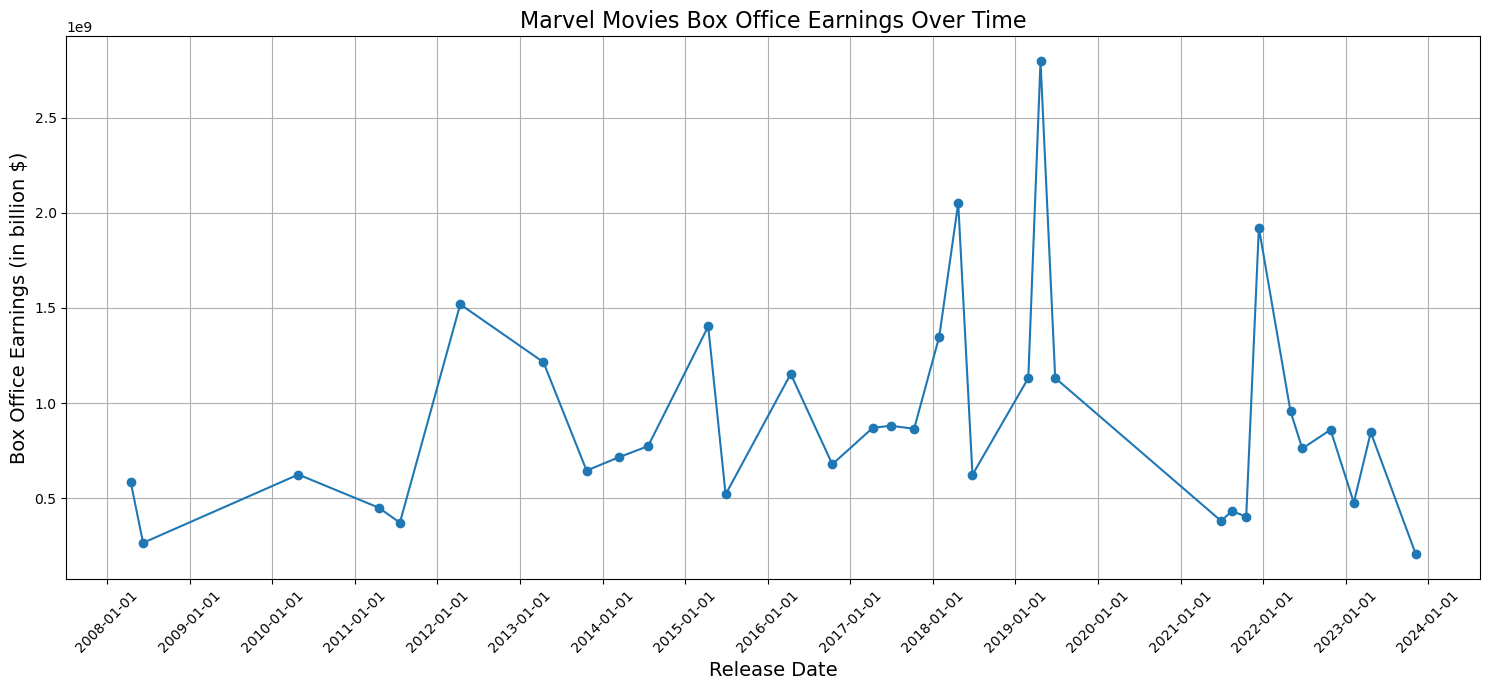

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Load the CSV file
file_path = 'marvel_movie_data_final.csv'  
marvel_data = pd.read_csv(file_path)

# Convert the 'Release dates (datetime)' column to datetime objects
marvel_data['Release dates (datetime)'] = pd.to_datetime(marvel_data['Release dates (datetime)'])

# Sort the data by release date
marvel_data_sorted = marvel_data.sort_values(by='Release dates (datetime)')

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(marvel_data_sorted['Release dates (datetime)'], marvel_data_sorted['Box office (float)'], marker='o')

# Formatting the plot
plt.title('Marvel Movies Box Office Earnings Over Time', fontsize=16)
plt.xlabel('Release Date', fontsize=14)
plt.ylabel('Box Office Earnings (in billion $)', fontsize=14)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


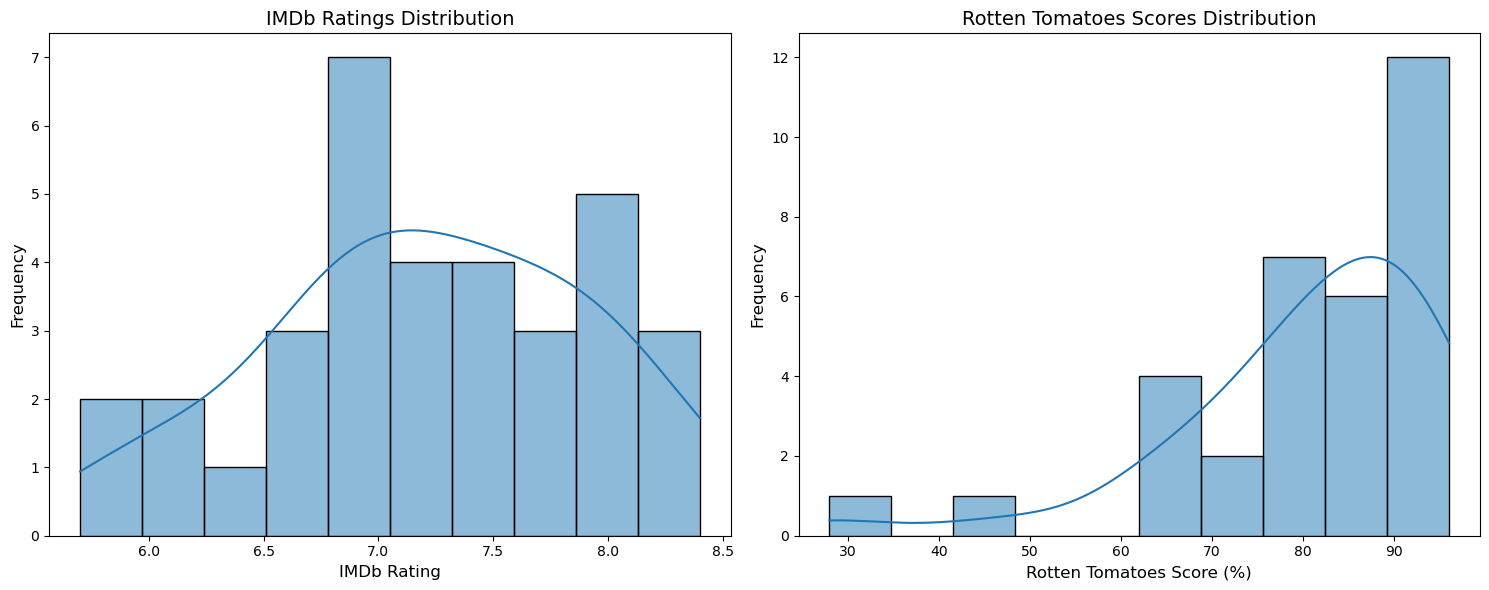

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'marvel_movie_data_final.csv'  
marvel_data = pd.read_csv(file_path)

# Remove percentage sign and convert Rotten Tomatoes scores to float
marvel_data['rotten_tomatoes'] = marvel_data['rotten_tomatoes'].str.rstrip('%').astype('float')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# IMDb ratings distribution
sns.histplot(marvel_data['imdb'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('IMDb Ratings Distribution', fontsize=14)
axes[0].set_xlabel('IMDb Rating', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Rotten Tomatoes ratings distribution
sns.histplot(marvel_data['rotten_tomatoes'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Rotten Tomatoes Scores Distribution', fontsize=14)
axes[1].set_xlabel('Rotten Tomatoes Score (%)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
